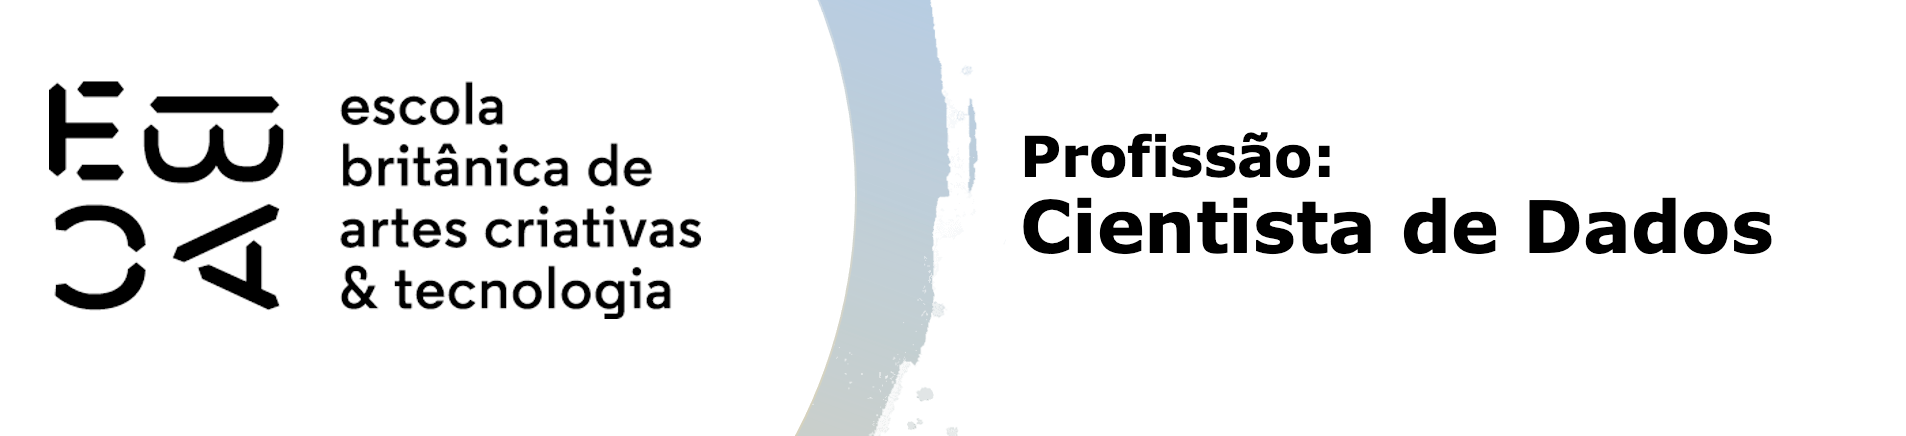

# Regressão III - Tarefa

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [2]:
# Carregar o arquivo com o índice definido como a primeira coluna do arquivo
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II.csv', index_col=0)

# Exibir as primeiras linhas do DataFrame
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [1]:
import pandas as pd

# Carregar o arquivo sem definir o índice para acelerar o processo
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II.csv', low_memory=False)

# Substituir valores missing pela média de cada coluna (aplicado apenas para colunas numéricas)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Salvar o DataFrame tratado em um novo arquivo para evitar retrabalho no futuro
df.to_csv('/Users/samwalford/Downloads/previsao_de_renda_II_tratado.csv', index=False)

print("Valores missing substituídos pela média e arquivo tratado foi salvo.")


Valores missing substituídos pela média e arquivo tratado foi salvo.


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [2]:
# Carregar o arquivo tratado
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II_tratado.csv')

# Converter a coluna de data para o formato datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Identificar a data máxima e calcular o limite de três meses atrás
ultimo_mes = df['data_ref'].max()
tres_meses_atras = ultimo_mes - pd.DateOffset(months=3)

# Separar as bases de treino e teste
base_teste = df[df['data_ref'] >= tres_meses_atras]  # Três últimos meses
base_treino = df[df['data_ref'] < tres_meses_atras]  # Restante dos dados

# Salvar as bases separadamente
base_treino.to_csv('/Users/samwalford/Downloads/base_treino.csv', index=False)
base_teste.to_csv('/Users/samwalford/Downloads/base_teste.csv', index=False)

print(f"Base de treino e teste separadas com sucesso:")
print(f"Base de treino: {base_treino.shape[0]} registros")
print(f"Base de teste: {base_teste.shape[0]} registros")


Base de treino e teste separadas com sucesso:
Base de treino: 550000 registros
Base de teste: 200000 registros


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [6]:
# Separar X (variáveis preditoras) e y (variável alvo)
y = df['renda']  # Variável alvo
X = df.drop(columns=['renda', 'data_ref', 'index'], errors='ignore')  # Remover a variável alvo e colunas irrelevantes


In [10]:
# Carregar o arquivo tratado
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II_tratado.csv')

# Remover colunas irrelevantes: 'index' e 'data_ref'
df = df.drop(columns=['index', 'data_ref'], errors='ignore')

# Converter colunas categóricas em variáveis numéricas com one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separar X (variáveis preditoras) e y (variável alvo)
y = df['renda']  # Variável alvo
X = df.drop(columns=['renda'], errors='ignore')  # Todas as outras variáveis são preditoras

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construir o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer predições
y_pred = modelo.predict(X_test)

# Calcular R² ajustado
n = X_test.shape[0]  # Número de observações no conjunto de teste
p = X_test.shape[1]  # Número de variáveis preditoras
r2 = r2_score(y_test, y_pred)
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Exibir os resultados
print(f"R²: {r2:.4f}")
print(f"R² ajustado: {r2_ajustado:.4f}")


R²: 0.2267
R² ajustado: 0.2266


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [17]:
# Carregar o arquivo
file_path = '/Users/samwalford/Downloads/previsao_de_renda_II_tratado.csv'
data = pd.read_csv(file_path)

# Verificar se as colunas necessárias estão presentes
if 'tempo_emprego' in data.columns and 'renda' in data.columns:
    # Criar a variável log-renda
    data['log_renda'] = data['renda'].apply(lambda x: np.log(x) if x > 0 else None)

    # Categorizar a variável tempo_emprego em 20 quantis
    data['tempo_emprego_categoria'] = pd.qcut(data['tempo_emprego'], q=20, duplicates='drop')

    # Criar a tabela de perfil (usando observed=False para evitar o FutureWarning)
    perfil_tabela = data.groupby('tempo_emprego_categoria', observed=False).agg(
        qtd_observacoes=('tempo_emprego', 'count'),
        media_log_renda=('log_renda', 'mean'),
        media_tempo_emprego=('tempo_emprego', 'mean')
    ).reset_index()

    # Exibir a tabela de perfil
    print(perfil_tabela)

    # (Opcional) Salvar a tabela de perfil como um arquivo CSV
    perfil_tabela.to_csv('/Users/samwalford/Downloads/tabela_de_perfil.csv', index=False)
else:
    print("As colunas necessárias ('tempo_emprego' e 'renda') não estão presentes no arquivo.")


         tempo_emprego_categoria  qtd_observacoes  media_log_renda  \
0   (0.11699999999999999, 0.816]            37699         8.134693   
1                 (0.816, 1.458]            37522         8.215925   
2                 (1.458, 2.099]            37437         8.335011   
3                 (2.099, 2.912]            37391         8.390223   
4                 (2.912, 3.636]            37915         8.522387   
5                 (3.636, 4.301]            37253         8.612289   
6                 (4.301, 4.934]            37401         8.673718   
7                 (4.934, 5.759]            37545         8.809638   
8                 (5.759, 6.622]            37495         8.905467   
9                 (6.622, 7.471]            37379         8.986450   
10                (7.471, 7.746]           136607         8.815827   
11                (7.746, 8.107]            13542         9.124771   
12                (8.107, 9.093]            37584         9.191291   
13               (9.

In [19]:
perfil_tabela.to_csv('/Users/samwalford/Downloads/tabela_de_perfil.csv', index=False)


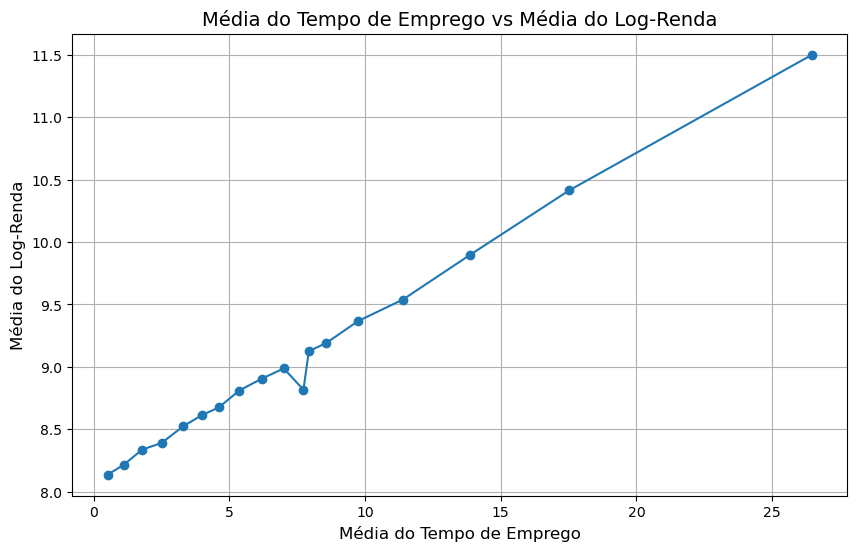

In [23]:
# Carregar o arquivo
file_path = '/Users/samwalford/Downloads/previsao_de_renda_II_tratado.csv'
data = pd.read_csv(file_path)

# Verificar se as colunas necessárias estão presentes
if 'tempo_emprego' in data.columns and 'renda' in data.columns:
    # Criar a variável log-renda
    data['log_renda'] = data['renda'].apply(lambda x: np.log(x) if x > 0 else None)

    # Categorizar a variável tempo_emprego em 20 quantis
    data['tempo_emprego_categoria'] = pd.qcut(data['tempo_emprego'], q=20, duplicates='drop')

    # Criar a tabela de perfil (usando observed=False para evitar o FutureWarning)
    perfil_tabela = data.groupby('tempo_emprego_categoria', observed=False).agg(
        qtd_observacoes=('tempo_emprego', 'count'),
        media_log_renda=('log_renda', 'mean'),
        media_tempo_emprego=('tempo_emprego', 'mean')
    ).reset_index()

    # Salvar a tabela de perfil como um arquivo CSV
    perfil_tabela.to_csv('/Users/samwalford/Downloads/tabela_de_perfil.csv', index=False)

    # Fazer o gráfico da média do tempo de emprego pela média do log-renda
    plt.figure(figsize=(10, 6))
    plt.plot(perfil_tabela['media_tempo_emprego'], perfil_tabela['media_log_renda'], marker='o')
    plt.title('Média do Tempo de Emprego vs Média do Log-Renda', fontsize=14)
    plt.xlabel('Média do Tempo de Emprego', fontsize=12)
    plt.ylabel('Média do Log-Renda', fontsize=12)
    plt.grid()
    plt.show()
else:
    print("As colunas necessárias ('tempo_emprego' e 'renda') não estão presentes no arquivo.")

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [26]:
# Carregar o arquivo
file_path = '/Users/samwalford/Downloads/previsao_de_renda_II_tratado.csv'
data = pd.read_csv(file_path)

# Verificar se as colunas necessárias estão presentes
if 'tempo_emprego' in data.columns and 'renda' in data.columns:
    # Separar as variáveis independentes e dependentes
    X = data[['tempo_emprego']].dropna()  # Certificar-se de não ter valores ausentes
    y = data['renda'].dropna()

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Técnica 1: Transformação Logarítmica
    X_train_log = np.log(X_train + 1)  # Adiciona 1 para evitar log(0)
    X_test_log = np.log(X_test + 1)

    modelo_log = LinearRegression()
    modelo_log.fit(X_train_log, y_train)
    y_pred_log = modelo_log.predict(X_test_log)

    r2_log = r2_score(y_test, y_pred_log)
    n_log = X_test_log.shape[0]
    p_log = X_test_log.shape[1]
    r2_ajustado_log = 1 - (1 - r2_log) * (n_log - 1) / (n_log - p_log - 1)

    # Técnica 2: Raiz Quadrada
    X_train_sqrt = np.sqrt(X_train)
    X_test_sqrt = np.sqrt(X_test)

    modelo_sqrt = LinearRegression()
    modelo_sqrt.fit(X_train_sqrt, y_train)
    y_pred_sqrt = modelo_sqrt.predict(X_test_sqrt)

    r2_sqrt = r2_score(y_test, y_pred_sqrt)
    n_sqrt = X_test_sqrt.shape[0]
    p_sqrt = X_test_sqrt.shape[1]
    r2_ajustado_sqrt = 1 - (1 - r2_sqrt) * (n_sqrt - 1) / (n_sqrt - p_sqrt - 1)

    # Exibir os resultados
    print("Resultados:")
    print(f"Técnica 1 - Transformação Logarítmica: R² ajustado = {r2_ajustado_log:.4f}")
    print(f"Técnica 2 - Transformação Raiz Quadrada: R² ajustado = {r2_ajustado_sqrt:.4f}")
else:
    print("As colunas necessárias ('tempo_emprego' e 'renda') não estão presentes no arquivo.")


Resultados:
Técnica 1 - Transformação Logarítmica: R² ajustado = 0.0921
Técnica 2 - Transformação Raiz Quadrada: R² ajustado = 0.1417


### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

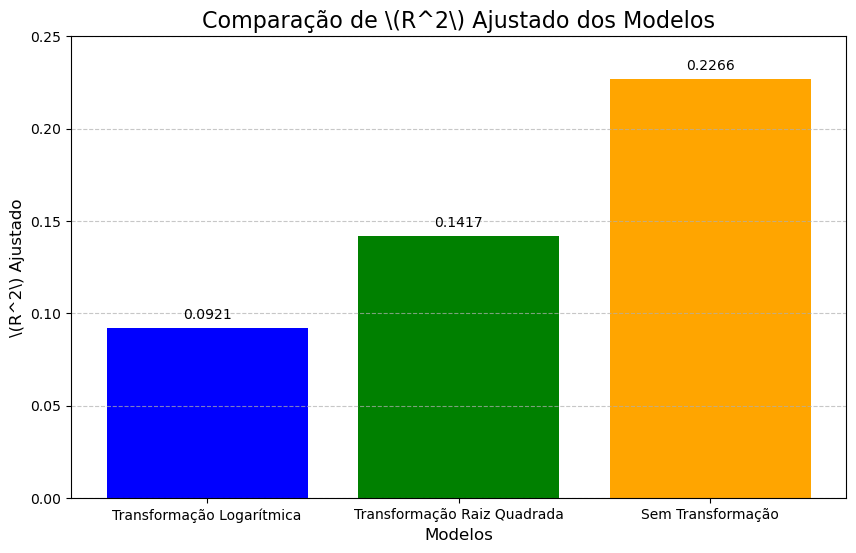

In [27]:
# Resultados dos modelos
modelos = ['Transformação Logarítmica', 'Transformação Raiz Quadrada', 'Sem Transformação']
r2_ajustado = [0.0921, 0.1417, 0.2266]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, r2_ajustado, color=['blue', 'green', 'orange'])
plt.title('Comparação de \(R^2\) Ajustado dos Modelos', fontsize=16)
plt.ylabel('\(R^2\) Ajustado', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.ylim(0, 0.25)  # Ajustar limite do eixo Y para visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores acima das barras
for i, v in enumerate(r2_ajustado):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)

# Exibir o gráfico
plt.show()


### **Análise dos Resultados**

#### **Técnica 1 - Transformação Logarítmica**
- **\( R^2 \) ajustado:** 0.0921  
- O modelo utilizando a transformação logarítmica apresentou um \( R^2 \) ajustado muito baixo, indicando que a transformação não foi eficiente para linearizar a relação entre o tempo de emprego e a renda.

#### **Técnica 2 - Transformação Raiz Quadrada**
- **\( R^2 \) ajustado:** 0.1417  
- A transformação raiz quadrada apresentou um desempenho ligeiramente melhor do que o logaritmo, mas ainda insuficiente para capturar uma relação linear forte entre as variáveis.

#### **Modelo Original (Sem Transformação)**
- **\( R^2 \) ajustado:** 0.2266  
- O modelo sem transformações foi o mais eficiente em termos de explicação da variabilidade na variável alvo (renda). Embora o desempenho seja moderado, ele sugere que as transformações aplicadas não contribuíram significativamente para o ajuste do modelo.

---

### **Conclusões**
1. O modelo original (sem transformações) apresentou os melhores resultados com \( R^2 \) ajustado de **0.2266**.
2. As transformações logarítmica e raiz quadrada não melhoraram significativamente o desempenho do modelo, indicando que o relacionamento entre as variáveis pode não ser bem linearizável.
3. Outras variáveis ou modelos mais complexos podem ser necessários para capturar a relação entre as variáveis.
